23_24

# El problema

Vamos a utilizar para ello el Boston DataSet

## Boston DataSet

(Boston Data Set - Repositorio [Index of /ml/machine-learning-databases/housing]

Texto extraído de:

**Advertencia** El conjunto de datos de precios de la vivienda de Boston tiene un problema ético: como se investigó, los autores de este conjunto de datos diseñaron una variable no invertible "B" asumiendo que la autosegregación racial tuvo un impacto positivo en los precios de la vivienda. Además, el objetivo de la investigación que condujo a la creación de este conjunto de datos fue estudiar el impacto de la calidad del aire, pero no brindó una demostración adecuada de la validez de esta suposición.
Por lo tanto, los mantenedores de scikit-learn desaconsejan encarecidamente el uso de este conjunto de datos a menos que el propósito del código sea estudiar y educar sobre cuestiones éticas en la ciencia de datos y el aprendizaje automático.

Objetivo: Determinar precio de la vivienda.

Una vez cargado el conjunto de datos (506 instancias), la descripción del mismo puede obtenerse fácilmente imprimiendo el campo DESCR.

***print(boston.DESCR)***
Los las características (x) y el objetivo (y) se almacenan en otros campos del conjunto de datos:

X_boston , y_boston = boston.data , boston.target


Este datasset también se utiliza en el Ejemplo 5.1 - Regresión y Regularización con Scikit-learn

# 0. Carga de Datos

En este caso los datos nos la facilita la propia API de scikit-learn



In [ ]:
# No utiulizamos esta sección de código para descargar el dataset porque sklearn lo ha descatalogado de sus librerías.
# import some data to play with
# from sklearn import datasets
# boston = datasets.load_boston()

#X = boston.data
#y = boston.target


En la siguiente url se describen cada una de las características:

http://lib.stat.cmu.edu/datasets/boston

 Variables in order:
 * CRIM     per capita crime rate by town
 * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS    proportion of non-retail business acres per town
 * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX      nitric oxides concentration (parts per 10 million)
 * RM       average number of rooms per dwelling
 * AGE      proportion of owner-occupied units built prior to 1940
 * DIS      weighted distances to five Boston employment centres
 * RAD      index of accessibility to radial highways
 * TAX      full-value property-tax rate per 10,000 dolars
 * PTRATIO  pupil-teacher ratio by town
 * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT    % lower status of the population
 * MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
target

In [ ]:
feature_names_data= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_names_target= ['MEDV']

In [ ]:
X = data
y = target

In [ ]:
# Separamos los datos de test y train
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.4, random_state=0)



In [ ]:
# Como propuesta de ejercicio voluntario está el aplicar el cross validation y diferentes valores de distancia y número de vecinos
# Similar a Ejemplo_3_4_Clasificación_con_kNN_Iris_DataSet.ipynb

# Definimos los paramétros
k = 15
w = "uniform"

# 1. elegir regresor
from sklearn.neighbors import KNeighborsRegressor # Se utiliza este método porque es un problema de regresión
# 2. instanciar el modelo
regr = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
regr.fit(Xtrain , ytrain)
# 4. predicción con nuevos datos
ypred = regr.predict(Xtest)


In [ ]:
# Obtenemos la calidad de los resultados obtenidos
# 5. Evaluación
from sklearn import metrics

metrics.mean_squared_error(ypred , ytest)

48.588659441707705

Text(0, 0.5, 'Predicted price ($1000s)')

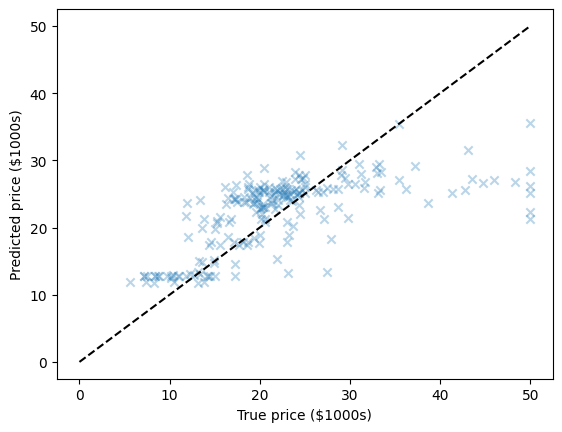

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(ytest, ypred , alpha = 0.3)
plt.scatter(ytest, ypred , alpha = 0.3, marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")

# Interpretación de la gráfica:
# En la diagonal están los valores de test, y los puntos dispersos son las predicción. De esta forma podemos ver lo cerca/lejos que están los resultados
# predichos de los de entrenamiento
# Cuanto más cerca están las X de la recta mejor será la predicción.


# Ejercicio voluntario

Realizar dos variaciones de esta solución, cambiando las variables con las que realizar la predicción, el valor del parámetro de la distancia o la métrica (La métrica por defecto es minkowski). Obtieniendo un documento final en pdf con los diferentes resultados/gráficos y precisión obtenidos. De forma que te permita determinar cuál sería la parametrizaciónn más acertada según las pruebas que has realizado.

